# <center> Machine Learning Assignment #2 </center>

This ipython notebook is work of **Adheesh Trivedi**.

### Loading and plotting the dataset

In [20]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('data.csv')

data = np.array(data)

data

array([[13.11792764, 17.21946148],
       [26.99425802, 19.91207811],
       [12.55247581, 23.80074952],
       ...,
       [22.37570853, 22.64677039],
       [20.52934168, 13.07510952],
       [32.95008067, 23.50320235]])

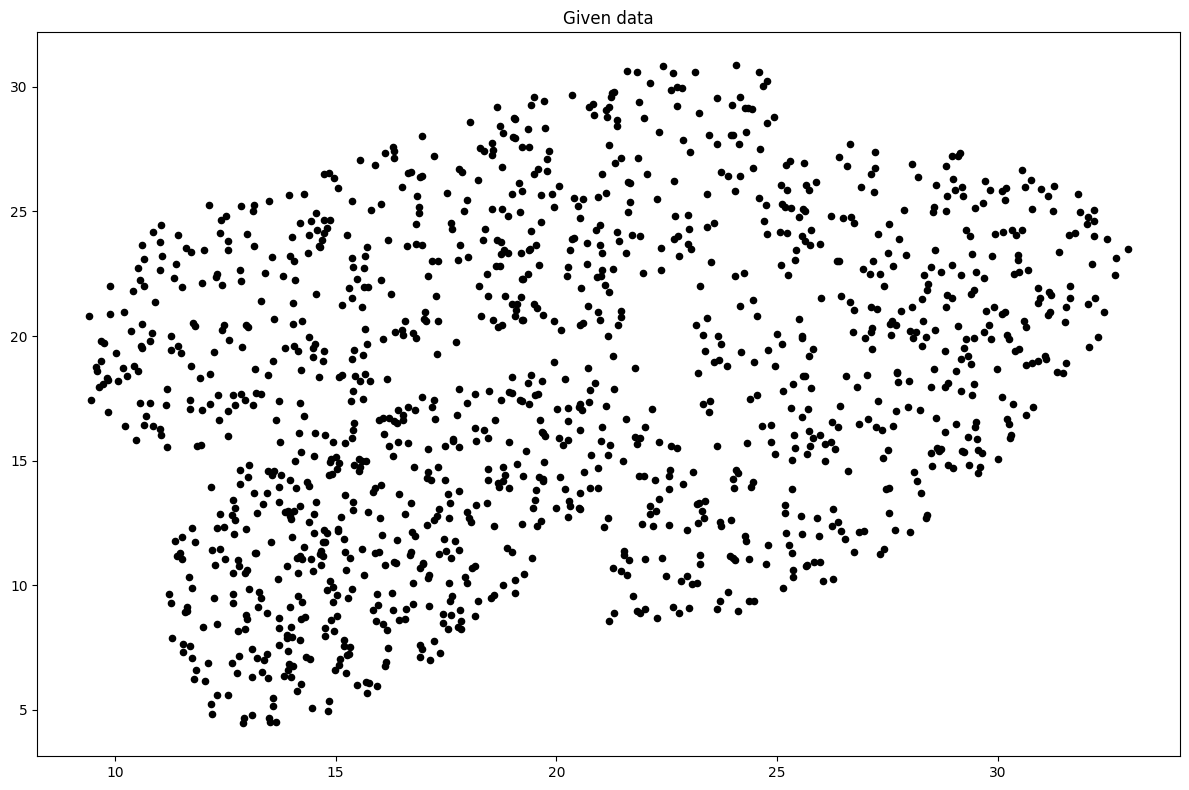

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = 'k')
plt.title('Given data')
plt.tight_layout()
plt.show()

# K-Means clustering

Silhouette score: 0.4207246046027701


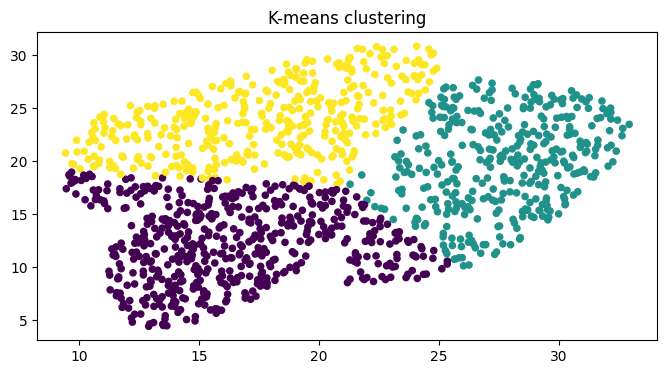

Silhouette score: 0.4207246046027703


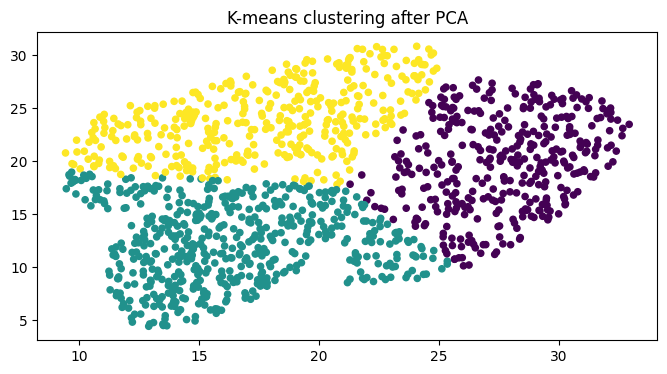

Silhouette score: 0.41350663333111143


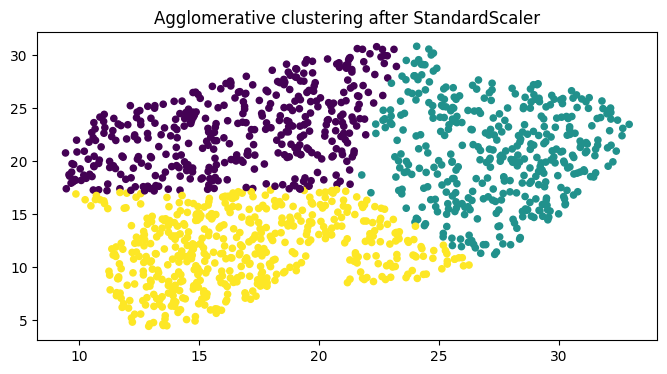

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

model = KMeans(3, algorithm = 'lloyd')
clusters = model.fit_predict(data)

sil_score = silhouette_score(data, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('K-means clustering')
plt.show();

data_fe = PCA(n_components = 2).fit_transform(data)
clusters = model.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('K-means clustering after PCA')
plt.show();

data_fe = StandardScaler().fit_transform(data)
clusters = model.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('Agglomerative clustering after StandardScaler')
plt.show();

# Agglomerative clustering

Silhouette score: 0.3874969110130127


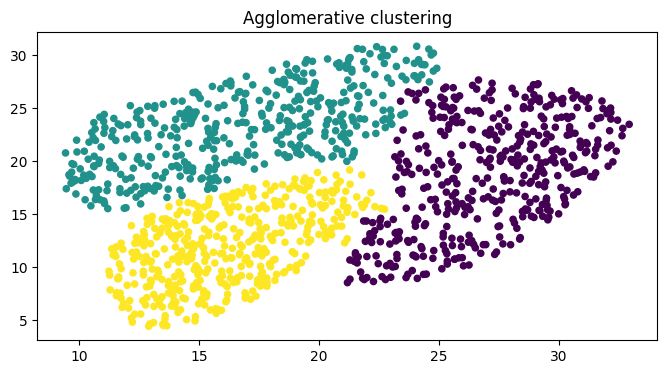

Silhouette score: 0.3874969110130127


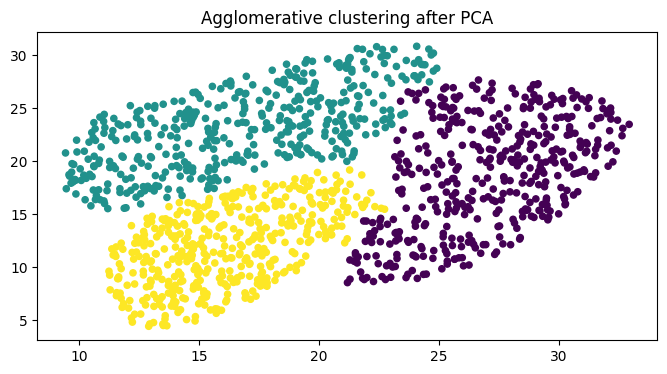

Silhouette score: 0.401834350450464


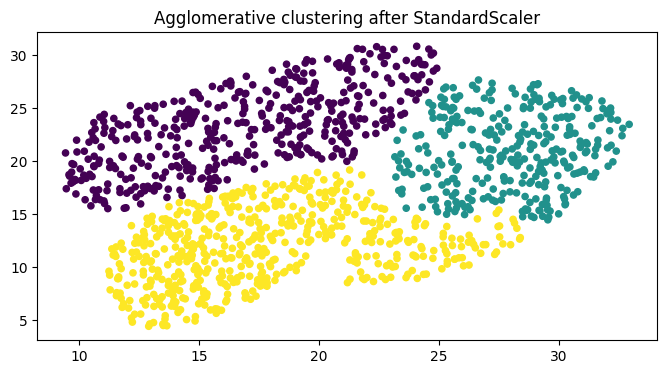

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

model = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = model.fit_predict(data)

sil_score = silhouette_score(data, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('Agglomerative clustering')
plt.show();

data_fe = PCA(n_components = 2).fit_transform(data)
clusters = model.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('Agglomerative clustering after PCA')
plt.show();

data_fe = StandardScaler().fit_transform(data)
clusters = model.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, clusters)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = clusters, cmap = 'viridis')
plt.title('Agglomerative clustering after StandardScaler')
plt.show();

## Best cluster and best feature engineering

I am going to select Agglomerative clustering with average linkage and PCA as the feature engineering technique!

We have to consider the fact that the scores we have used to measure the performance of the algorithm is not the most optimum. We choose Agglomerative over K-Means because it is more tolerant to both convex and concave shaped clusters while K-Means is not.

Also consider the fact that both the algorithms give pretty respectible scores, and are withing very close margin.

In [ ]:
## Save the clusters obtained from best model

data_transformed = PCA(n_components = 2).fit_transform(data)
best_model = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = best_model.fit_predict(data_transformed)

np.savetxt('final_clusters.csv', clusters, fmt='%d')